In [19]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [20]:
# 加载数据
mem = Memory("./mycache")
@mem.cache
def get_data():
    data = load_svmlight_file("./data/australian_scale")
    return data[0],data[1]

X,y = get_data()
# N,D = X.shape
# print(N,D)
# print(type(X))
# C = len(set(y))
# y = np.where(y>0,1,0).reshape(-1,1)
# print(y)

In [21]:
# 分割训练集和验证集
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.4)
X_train = X_train.toarray()
X_val = X_val.toarray()
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
# print(X_train[0])

# print(X_train[0])
# print(y_train[0])

In [22]:
def hinge_loss(w,X,Y,C=1.0):
    N,D   = np.shape(X)  
    zero = np.zeros((N,1))
    score = X.dot(w)
    margin = 1 - C * Y * score
    return np.max([zero,margin],axis=0)

In [23]:
def forward(w,X,Y,reg=0.0,C=1.0):
    N,D = np.shape(X)  
    loss = hinge_loss(w,X,Y,C)
    reg_loss = 1.0/2 * reg * w.transpose().dot(w)
    loss = 1.0/N * loss.sum()  + reg_loss
    return loss[0][0]

In [24]:
def backward(w,X,Y,reg=0.0,C=1.0):
    N,D = np.shape(X)  
    loss = hinge_loss(w,X,Y,C)
    counts = np.zeros((N,1))
#     区分
    counts[np.nonzero(loss)] = 1
    dW = - 1.0/float(N) * C * X.transpose().dot(Y * counts).sum(axis=1).reshape((D,1))
    dW += reg * w
    return dW

In [25]:
def predict(w,X,threshold=0.5):
    raw = X.dot(w)
    raw[raw<=threshold] = -1
    raw[raw>threshold] = 1
    return raw

In [26]:
def accuracy(w,X,Y,threshold=0.5):
    num_records,num_features  = np.shape(X)  
    P = predict(w,X,threshold)
    
    is_right = P * Y
    is_right[is_right < 0] = 0
    
    return 1.0/num_records * np.count_nonzero(is_right)

avg_train_loss:0.522114676852641,avg_val_loss:0.5618017028780596
min train loss:0.33386760749395455,min val loss:0.37745552469952004


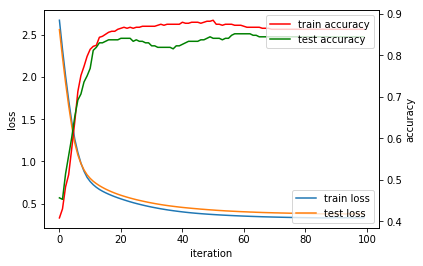

In [27]:

reg = 0.1
lr = 0.2
C = 1.0
threshold=0.5
max_iterate = 100
train_loss_hist = []
val_loss_hist = []
accuracy_train = []
accuracy_test = []
N,D = X_train.shape
w = np.random.normal(size=(D,1))
for epoch in range(max_iterate):
    train_loss_hist.append(forward(w,X_train,y_train,reg,C))
    val_loss_hist.append(forward(w,X_val,y_val,reg,C))
    accuracy_train.append(accuracy(w,X_train,y_train,threshold))
    accuracy_test.append(accuracy(w,X_val,y_val,threshold))
    w = w - lr * backward(w,X_train,y_train,reg,C)
    
print('avg_train_loss:{},avg_val_loss:{}'.format(np.mean(train_loss_hist),np.mean(val_loss_hist)))
print('min train loss:{},min val loss:{}'.format(train_loss_hist[-1],val_loss_hist[-1]))

fig, ax = plt.subplots()
ax_e = ax.twinx()
train_loss_line = ax.plot(range(max_iterate),train_loss_hist,label='train loss')
test_loss_line = ax.plot(range(max_iterate),val_loss_hist,label='test loss')
train_accuracy_line = ax_e.plot(range(max_iterate),accuracy_train,'r',label='train accuracy')
test_accuracy_line = ax_e.plot(range(max_iterate),accuracy_test,'g',label='test accuracy')

ax.set(xlabel='iteration', ylabel='loss')
ax_e.set_ylabel('accuracy')

ax.legend(loc=4)
ax_e.legend(loc=1)
plt.show()
